In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("data/shooter.csv")
df

,Damage,Distance
0,6.107700,0.000000
1,7.255737,0.256410
2,8.718704,0.512821
3,10.228818,0.769231
4,10.145794,1.025641
5,12.861720,1.282051
6,14.723243,1.538462
7,18.367406,1.794872
8,18.559477,2.051282
9,16.556623,2.307692


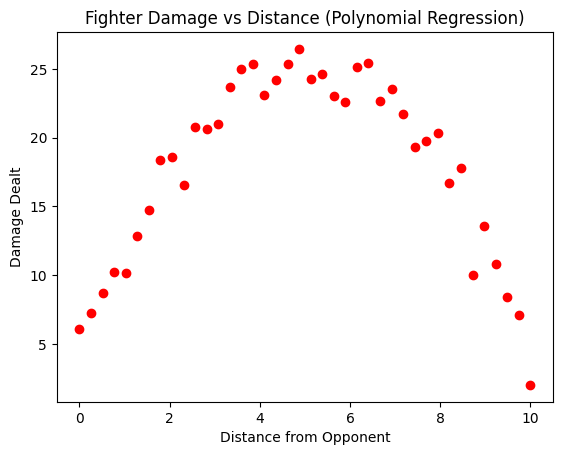

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['Distance'], df['Damage'], color='red', label='Actual Damage')
plt.title("Fighter Damage vs Distance (Polynomial Regression)")
plt.xlabel("Distance from Opponent")
plt.ylabel("Damage Dealt")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Damage", axis=1)
y = df["Damage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))


-0.17782930845727174


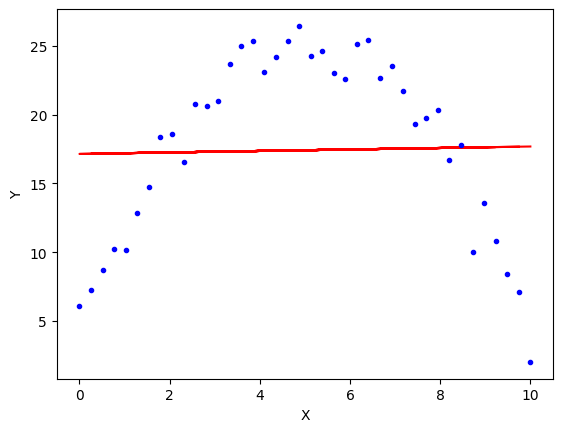

In [9]:
plt.plot(X_train, lr.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

#applying polynomial regression degree 2
#include bias parameter
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [11]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)
print(r2_score(y_test, y_pred))

0.9590799080361335


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


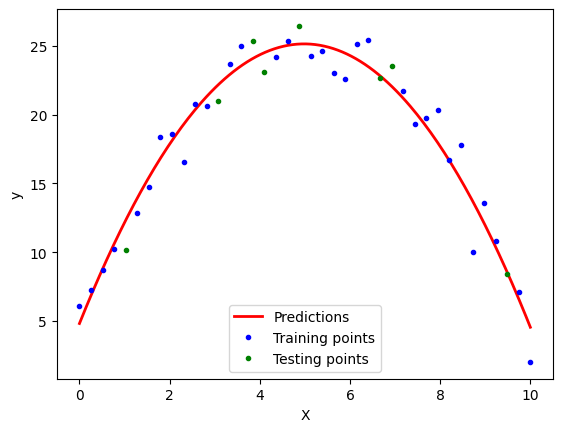

In [12]:
X_new = np.linspace(0, 10, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [13]:
def plot_learning_curve(degree):
  #applying polynomial regression degree n
  poly = PolynomialFeatures(degree=degree, include_bias=True)
  X_train_trans = poly.fit_transform(X_train)
  X_test_trans = poly.transform(X_test)

  #include bias parameter
  lr = LinearRegression()
  lr.fit(X_train_trans, y_train)
  y_pred = lr.predict(X_test_trans)
  print(r2_score(y_test, y_pred))

  X_new = np.linspace(0, 10, 200).reshape(200, 1)
  X_new_poly = poly.transform(X_new)
  y_new = lr.predict(X_new_poly)
  plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
  plt.plot(X_train, y_train, "b.",label='Training points')
  plt.plot(X_test, y_test, "g.",label='Testing points')
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend()
  plt.show()

0.9522811999125995


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


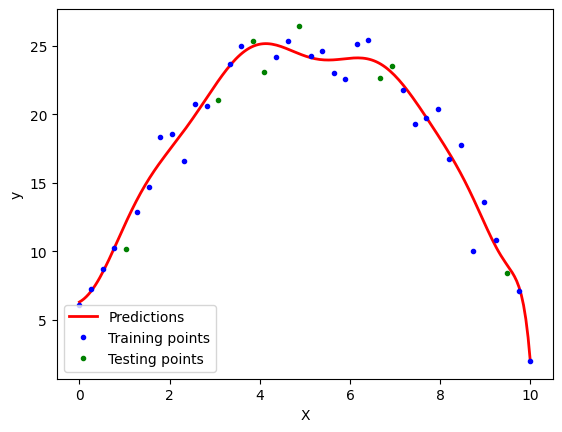

In [14]:
plot_learning_curve(13)